In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline




# Генерируем данные с двумя признаками, образующими три различимые области
np.random.seed(0)


# Генерируем точки для трех областей
data1 = np.random.rand(100, 2) * 0.4
data2 = np.random.rand(100, 2) * 0.4 + np.array([0.7, 0.4])
data3 = np.random.rand(100, 2) * 0.4 + np.array([0.2, 0.6])

data = np.vstack((data1, data2, data3))

df = pd.DataFrame(data, columns=['Время обращения', 'Неполадки'])

df['Цвет'] = 'b'

df.head()

,Время обращения,Неполадки,Цвет
0,0.219525,0.286076,b
1,0.241105,0.217953,b
2,0.169462,0.258358,b
3,0.175035,0.356709,b
4,0.385465,0.153377,b


<Axes: xlabel='Время обращения', ylabel='Неполадки'>

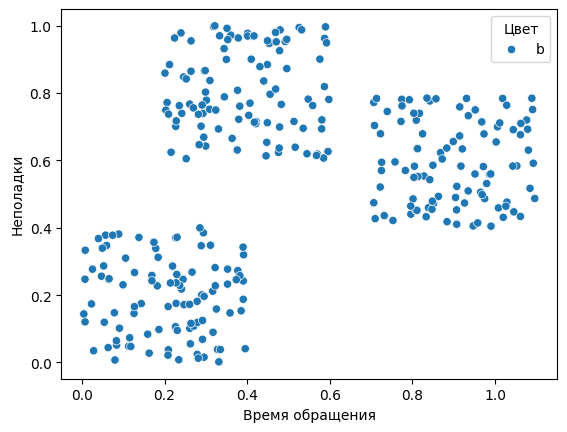

In [25]:
sns.scatterplot(data=df, x='Время обращения', y='Неполадки', hue='Цвет', markers='o')

In [26]:
x = df.iloc[:10, :2]
x

,Время обращения,Неполадки
0,0.219525,0.286076
1,0.241105,0.217953
2,0.169462,0.258358
3,0.175035,0.356709
4,0.385465,0.153377
5,0.316690,0.211558
6,0.227218,0.370239
7,0.028414,0.034852
8,0.008087,0.333048
9,0.311263,0.348005


In [27]:
k = 3

x = x.values

In [28]:
np.random.seed(1)

idx = np.random.choice(x.shape[0], k, replace=False)

centroids = x[idx, :]

centroids

array([[0.16946192, 0.25835765],
       [0.3112627 , 0.34800486],
       [0.22721782, 0.37023866]])

In [29]:
from scipy.spatial.distance import cdist

distances = cdist(x, centroids, 'euclidean')
distances

array([[0.05722452, 0.110684  , 0.08451372],
       [0.08225141, 0.14776829, 0.1529173 ],
       [0.        , 0.16776199, 0.12590911],
       [0.09850932, 0.13650562, 0.05390831],
       [0.24016327, 0.20829343, 0.26846108],
       [0.15448729, 0.13655479, 0.18216705],
       [0.12590911, 0.08693608, 0.        ],
       [0.26429017, 0.42198109, 0.38988099],
       [0.17782123, 0.30354406, 0.22226406],
       [0.16776199, 0.        , 0.08693608]])

In [30]:
points = distances.argmin(1)

new_centroids = []

for i in range(k):
  pts = x[points == i]
  new_centroids.append(pts.mean(axis=0))

new_centroids

[array([0.13331889, 0.22605726]),
 array([0.33780594, 0.23764648]),
 array([0.20112635, 0.36347393])]

In [31]:
new_centroids = np.vstack(new_centroids)


In [32]:
tol = 0.1

stop_criteria = False

while not stop_criteria:
  distances = cdist(x, centroids, 'euclidean')
  points = distances.argmin(1)

  new_centroids = []
  for i in range(k):
    pts = x[points == i]
    new_centroids.append(pts.mean(axis=0))

  old_centroids = centroids.copy()
  centroids = np.vstack(new_centroids)
  stop_criteria = (np.abs(old_centroids - centroids) > tol).sum() == 0

points

array([2, 1, 0, 2, 1, 1, 2, 0, 0, 2])

In [33]:
class MyKMeans(object):
  def __init__(self, k, tol=0.1):
    self.k = k
    self.tol = tol
    self.centroids = None

  def fit(self, x):
    idx = np.random.choice(x.shape[0], self.k, replace=False)
    centroids = x[idx, :]
    stop_criteria = False

    while not stop_criteria:
      distances = cdist(x, centroids, 'euclidean')
      points = distances.argmin(1)

      new_centroids = []

      for i in range(self.k):
        pts = x[points == i]
        new_centroids.append(pts.mean(axis=0))

      old_centroids = centroids.copy()
      centroids = np.vstack(new_centroids)
      stop_criteria = (np.abs(old_centroids - centroids) > self.tol).sum() == 0
    self.centroids = centroids

    return self

  def predict(self, x):
    distances = cdist(x, self.centroids, 'euclidean')
    points = distances.argmin(1)
    return points


In [34]:
x = df.iloc[:, :2].values
km = MyKMeans(k=3).fit(x)

point = km.predict(x)

In [35]:
from sklearn.cluster import KMeans
x=df.iloc[:, :2]

km = KMeans(n_clusters=3)
km.fit(x)
points=km.predict(x)

<Axes: xlabel='Время обращения', ylabel='Неполадки'>

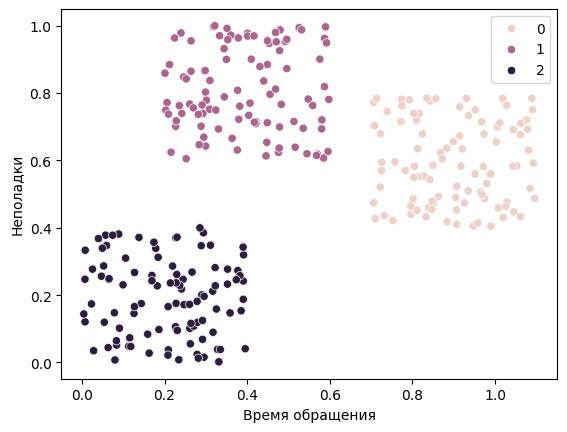

In [36]:
sns.scatterplot(x=df['Время обращения'],
                y=df['Неполадки'],
                hue=points)


<Axes: >

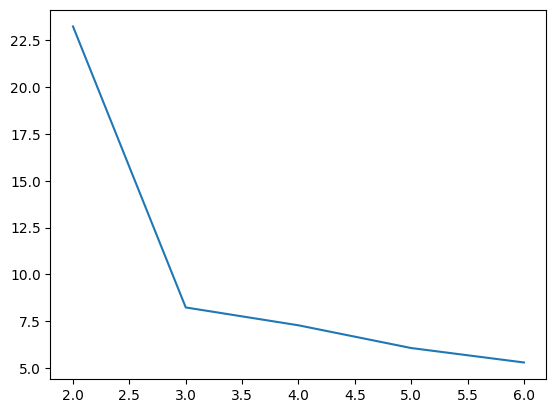

In [37]:
n_clusters = list(range(2, 7))

metrics = []

for k in n_clusters:
    km = KMeans(n_clusters=k).fit(x)
    metrics.append(km.inertia_)

sns.lineplot(x=n_clusters, y=metrics)


## Кластеризация. DBSCAN.


In [38]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


# Создаем большой набор данных
x = np.array([[1, 2], [1.5, 1.8], [0.8, 1.2], [5, 8], [8, 8], [8.5, 7.5], [1, 0.6], [0.9, 0.4], [9, 11], [9.5, 10.9]])
x = np.append(x, np.random.randn(90, 2), axis=0)

# Масштабируем данные
x = StandardScaler().fit_transform(x)



In [39]:
dbscan=DBSCAN(eps=0.3, min_samples=2)
dbscan.fit(x)

DBSCAN(eps=0.3, min_samples=2)

In [40]:
labels = dbscan.labels_

In [41]:
print(labels)

[ 0  0  0 -1 -1 -1  0  0  1  1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  2  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  2  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  3
  3  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  2  0  0  0  0
  0  0  0  0]


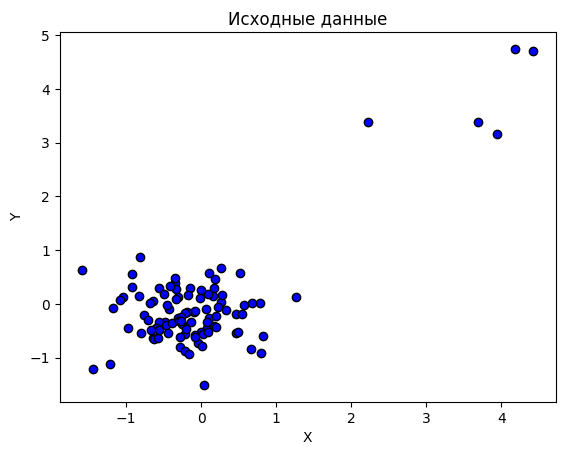

In [42]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Визуализируем исходные данные
plt.scatter(x[:, 0], x[:, 1], c='blue', marker='o', edgecolor='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Исходные данные')
plt.show()


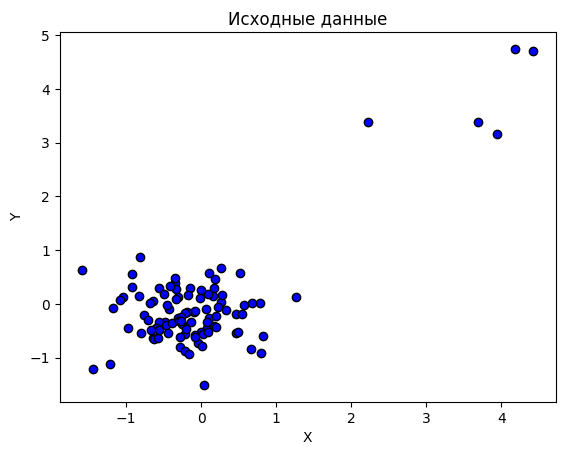

In [45]:

# Визуализируем исходные данные
plt.scatter(x[:, 0], x[:, 1], c='blue', marker='o', edgecolor='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Исходные данные')
plt.show()


<ipython-input-48-d93064a86930>:6: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x[labels == -1][:, 0], x[labels == -1][:, 1], c='red', marker='x', edgecolor='black')


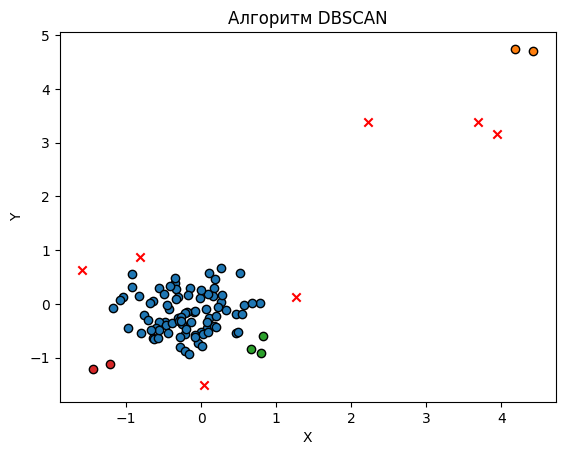

In [48]:
# Визуализируем результаты алгоритма DBSCAN
for cluster_id in range(n_clusters):
    cluster_points = x[labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], marker='o', edgecolor='black')

plt.scatter(x[labels == -1][:, 0], x[labels == -1][:, 1], c='red', marker='x', edgecolor='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Алгоритм DBSCAN')
plt.show()
